<a href="https://colab.research.google.com/github/UXDynamicSolution/datamining_public/blob/main/reforzamiento3_correlacion_pearson_indicadores_mundiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Correlación de Pearson

## Examina la relación entre dos o más variables

✍️ **Autor del notebook:** _Carlos Muñoz Salgado_


Con el **coeficiente de correlación de Pearson** podemos medir:

- 📈 **Intensidad de la correlación**.
- 🔁 **Dirección de la correlación** (Positiva, Negativa o Nula).

### 🔍 Interpretación de la fuerza de la correlación:

| Rango del coeficiente | Interpretación        |
|------------------------|------------------------|
| 0.7 a 1.0              | Correlación fuerte     |
| 0.3 a 0.7              | Correlación moderada   |
| 0.0 a 0.3              | Correlación débil      |
| 0                      | Sin correlación        |
| -0.3 a 0               | Correlación débil      |
| -0.7 a -0.3            | Correlación moderada   |
| -1.0 a -0.7            | Correlación fuerte     |

---

# Podremos decir que "existe una correlación positiva" cuando se cumplen ciertos criterios:
- Los valores grandes de una variable van acompañados de valores grandes de otra variable.
- los valores pequeños de una variable van acompañados de valores pequeños de otra variable.

# Podemos decir que "existe una correlación negativa" cuando se cumplen ciertos criterios:
- Los valores grandes acompañados de valores pequeños de otra variable.
- los valores pequeños acompañados de valores grandes de otra variable.

# Para calcular correctamente el coeficiente de correlación de pearson deben cumplirse ciertos supuestos.

- Relación Lineal: existe una relación lineal de las variables, si es curva no es un indicador claro.
- Distribución Normal: Si las variables son muy asimetricas (usar otro modelo)
- Pares Relacionados.
- Se detectan y eliminan Outliers.






url descarga dataset: https://docs.google.com/spreadsheets/d/1dlQJaqYL8P3iaGWHAdL_h93g5Wf7WBFe/edit?usp=sharing&ouid=101394296041187818286&rtpof=true&sd=true

In [ ]:
import pandas as pd
import numpy as np

📊 Carga del Dataset

En este ejemplo se cargará un dataset con indicadores macroeconómicos de distintos países, descargado desde internet.

    ⚠️ Importante: Los datos utilizados en este ejercicio pueden no coincidir exactamente con cifras reales o actuales. El propósito principal es entender y aplicar el concepto del coeficiente de correlación de Pearson, no realizar un análisis económico riguroso.

In [ ]:
df = pd.read_excel('indicadores_mundiales.xlsx')

In [ ]:
df.head(50)

,pais,region,derechos_propiedad,eficacia_judicial,integridad_gobierno,carga_tributaria,gasto_gobierno,salud_fiscal,libertad_negocios,libertad_laboral,...,poblacion,pib,crecimiento_pib,crecimiento_pib_5_anios,pib_per_capita,desempleo,inflacion,flujo_ied,deuda_publica,clase
0,Afghanistan,Asia-Pacific,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,...,35.5,69.6,2.5,2.9,1958,8.8,5.0,53.9,7.3,poor
1,Albania,Europe,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,...,2.9,36.0,3.9,2.5,12507,13.9,2.0,1119.1,71.2,rich
2,Algeria,Middle East and North Africa,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,...,41.5,632.9,2.0,3.1,15237,10.0,5.6,1203.0,25.8,rich
3,Angola,Sub-Saharan Africa,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,...,28.2,190.3,0.7,2.9,6753,8.2,31.7,-2254.5,65.3,poor
4,Argentina,Americas,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,...,44.1,920.2,2.9,0.7,20876,8.7,25.7,11857.0,52.6,rich
5,Armenia,Europe,57.2,46.3,38.6,84.7,79.0,53.0,78.3,71.4,...,3.0,28.3,7.5,3.6,9456,18.2,0.9,245.7,53.5,poor
6,Australia,Asia-Pacific,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,...,24.8,1246.5,2.3,2.4,50334,5.6,2.0,46368.0,41.6,rich
7,Austria,Europe,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,...,8.8,439.6,2.9,1.3,49869,5.5,2.2,9629.6,78.8,rich
8,Azerbaijan,Asia-Pacific,59.1,53.1,44.7,87.5,59.5,89.4,69.5,63.9,...,9.8,171.8,0.1,1.2,17492,5.0,13.0,2867.0,54.7,rich
9,Bahamas,Americas,42.2,46.9,43.7,97.3,86.8,65.7,68.5,67.5,...,0.4,11.6,1.3,-0.7,31139,12.6,1.4,927.7,57.2,rich


In [ ]:
df.tail()

,pais,region,derechos_propiedad,eficacia_judicial,integridad_gobierno,carga_tributaria,gasto_gobierno,salud_fiscal,libertad_negocios,libertad_laboral,...,poblacion,pib,crecimiento_pib,crecimiento_pib_5_anios,pib_per_capita,desempleo,inflacion,flujo_ied,deuda_publica,clase
178,Venezuela,Americas,7.6,13.1,7.9,74.7,58.1,17.6,33.9,28.0,...,31.4,380.7,-14.0,-7.8,12114,7.7,1087.5,-68.0,34.9,rich
179,Vietnam,Asia-Pacific,49.8,40.3,34.0,79.7,74.1,40.7,63.5,62.8,...,93.6,647.4,6.8,6.2,6913,2.1,3.5,14100.0,58.2,poor
180,Yemen,Middle East and North Africa,19.6,22.2,20.3,NaN,83.7,0.0,45.1,49.8,...,30.0,38.6,-13.8,-16.1,1287,14.0,4.9,-269.9,141.0,poor
181,Zambia,Sub-Saharan Africa,45.0,35.6,32.3,72.3,80.1,12.3,71.1,46.0,...,17.2,68.9,3.6,4.0,3996,7.8,6.6,1091.2,62.2,poor
182,Zimbabwe,Sub-Saharan Africa,29.7,24.8,15.8,62.3,74.5,23.7,33.4,43.3,...,14.9,34.0,3.0,2.6,2283,5.0,1.3,289.4,78.4,poor


In [ ]:
df.dtypes

,0
pais,object
region,object
derechos_propiedad,float64
eficacia_judicial,float64
integridad_gobierno,float64
carga_tributaria,float64
gasto_gobierno,float64
salud_fiscal,float64
libertad_negocios,float64
libertad_laboral,float64


In [ ]:
df.isnull().sum() #vemos registros en null por columna

NameError: name 'df' is not defined

# Resultado con tratamiento de nulos:

In [ ]:
df.describe()

,derechos_propiedad,eficacia_judicial,integridad_gobierno,carga_tributaria,gasto_gobierno,salud_fiscal,libertad_negocios,libertad_laboral,libertad_monetaria,libertad_comercial,...,gasto_gobierno_pib,poblacion,pib,crecimiento_pib,crecimiento_pib_5_anios,pib_per_capita,desempleo,inflacion,flujo_ied,deuda_publica
count,183.000000,183.000000,183.000000,180.000000,183.000000,183.000000,183.000000,183.000000,183.000000,181.000000,...,182.000000,183.000000,183.000000,183.000000,182.000000,183.000000,178.000000,182.000000,180.000000,182.000000
mean,52.513115,45.111475,41.769399,77.212778,64.203825,65.996721,63.763934,59.449180,75.220219,74.411602,...,33.863736,40.417486,694.349727,3.479235,2.988462,19517.907104,7.392135,10.586264,7952.970556,56.469231
std,19.633836,18.088386,19.680728,13.208314,23.150984,31.764160,15.673994,14.394836,11.077563,12.125786,...,15.476484,145.929403,2421.696847,5.850426,2.933994,22680.659817,5.688103,80.507501,26051.168464,34.163855
min,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,...,10.600000,0.100000,0.200000,-14.000000,-16.100000,15.000000,0.100000,-0.900000,-8296.900000,0.000000
25%,37.100000,31.000000,27.650000,70.975000,51.700000,39.900000,54.500000,50.700000,72.100000,66.800000,...,24.675000,2.500000,26.300000,1.850000,1.900000,3525.000000,3.725000,1.300000,213.400000,34.950000
50%,50.600000,42.900000,36.400000,78.050000,68.800000,80.300000,65.100000,59.900000,77.800000,76.200000,...,32.350000,8.800000,83.600000,3.200000,3.050000,11102.000000,5.650000,2.750000,912.150000,49.900000
75%,65.900000,55.050000,50.300000,85.425000,82.600000,91.450000,75.050000,68.550000,81.750000,84.400000,...,40.225000,29.750000,402.550000,4.700000,4.475000,28306.500000,9.375000,5.450000,4119.750000,70.125000
max,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,96.400000,91.000000,88.000000,95.000000,...,139.200000,1390.100000,23159.100000,70.800000,9.900000,124529.000000,27.300000,1087.500000,275381.000000,236.400000


In [ ]:
#eliminar registros nulos
"""
Tecnicas de eliminacion de nulos:
- imputacion: se rellenan los valores vacios con algun valor, por lo general se usa el promedio del
valor de la columna.
- extensión de la imputación: Se agrega una nueva columna indicando el valor reemplazado.
"""

df_limpio = df.dropna() #elimina los registros nulos de las filas
df_limpio.shape

print(f"DF ANTES {df.shape}, DF DESPUES {df_limpio.shape}") #comparamos antes vs despues de dropna
# aqui aparecera 0 ya que se limpiaron las 2 ultimas filas del dataset

DF ANTES (183, 29), DF DESPUES (173, 29)


In [ ]:
# Seleccionar solo las columnas numéricas
df_numeric_2 = df_limpio.select_dtypes(include=['number'])

# Calcular la matriz de correlación
# Se calcula con Pandas: df.corr() variable_dataframe.corr()
correlation_matrix_2 = df_numeric_2.corr()
print(correlation_matrix_2)

                         derechos_propiedad  eficacia_judicial  \
derechos_propiedad                 1.000000           0.826805   
eficacia_judicial                  0.826805           1.000000   
integridad_gobierno                0.866998           0.888880   
carga_tributaria                  -0.223515          -0.245655   
gasto_gobierno                    -0.409670          -0.290839   
salud_fiscal                       0.329969           0.287380   
libertad_negocios                  0.795173           0.702661   
libertad_laboral                   0.432746           0.421694   
libertad_monetaria                 0.508726           0.409702   
libertad_comercial                 0.714819           0.565308   
libertad_inversion                 0.655495           0.510584   
libertad_financiera                0.733347           0.594981   
tasa_arancel                      -0.583775          -0.442500   
impuesto_renta                     0.137473           0.181535   
impuesto_c

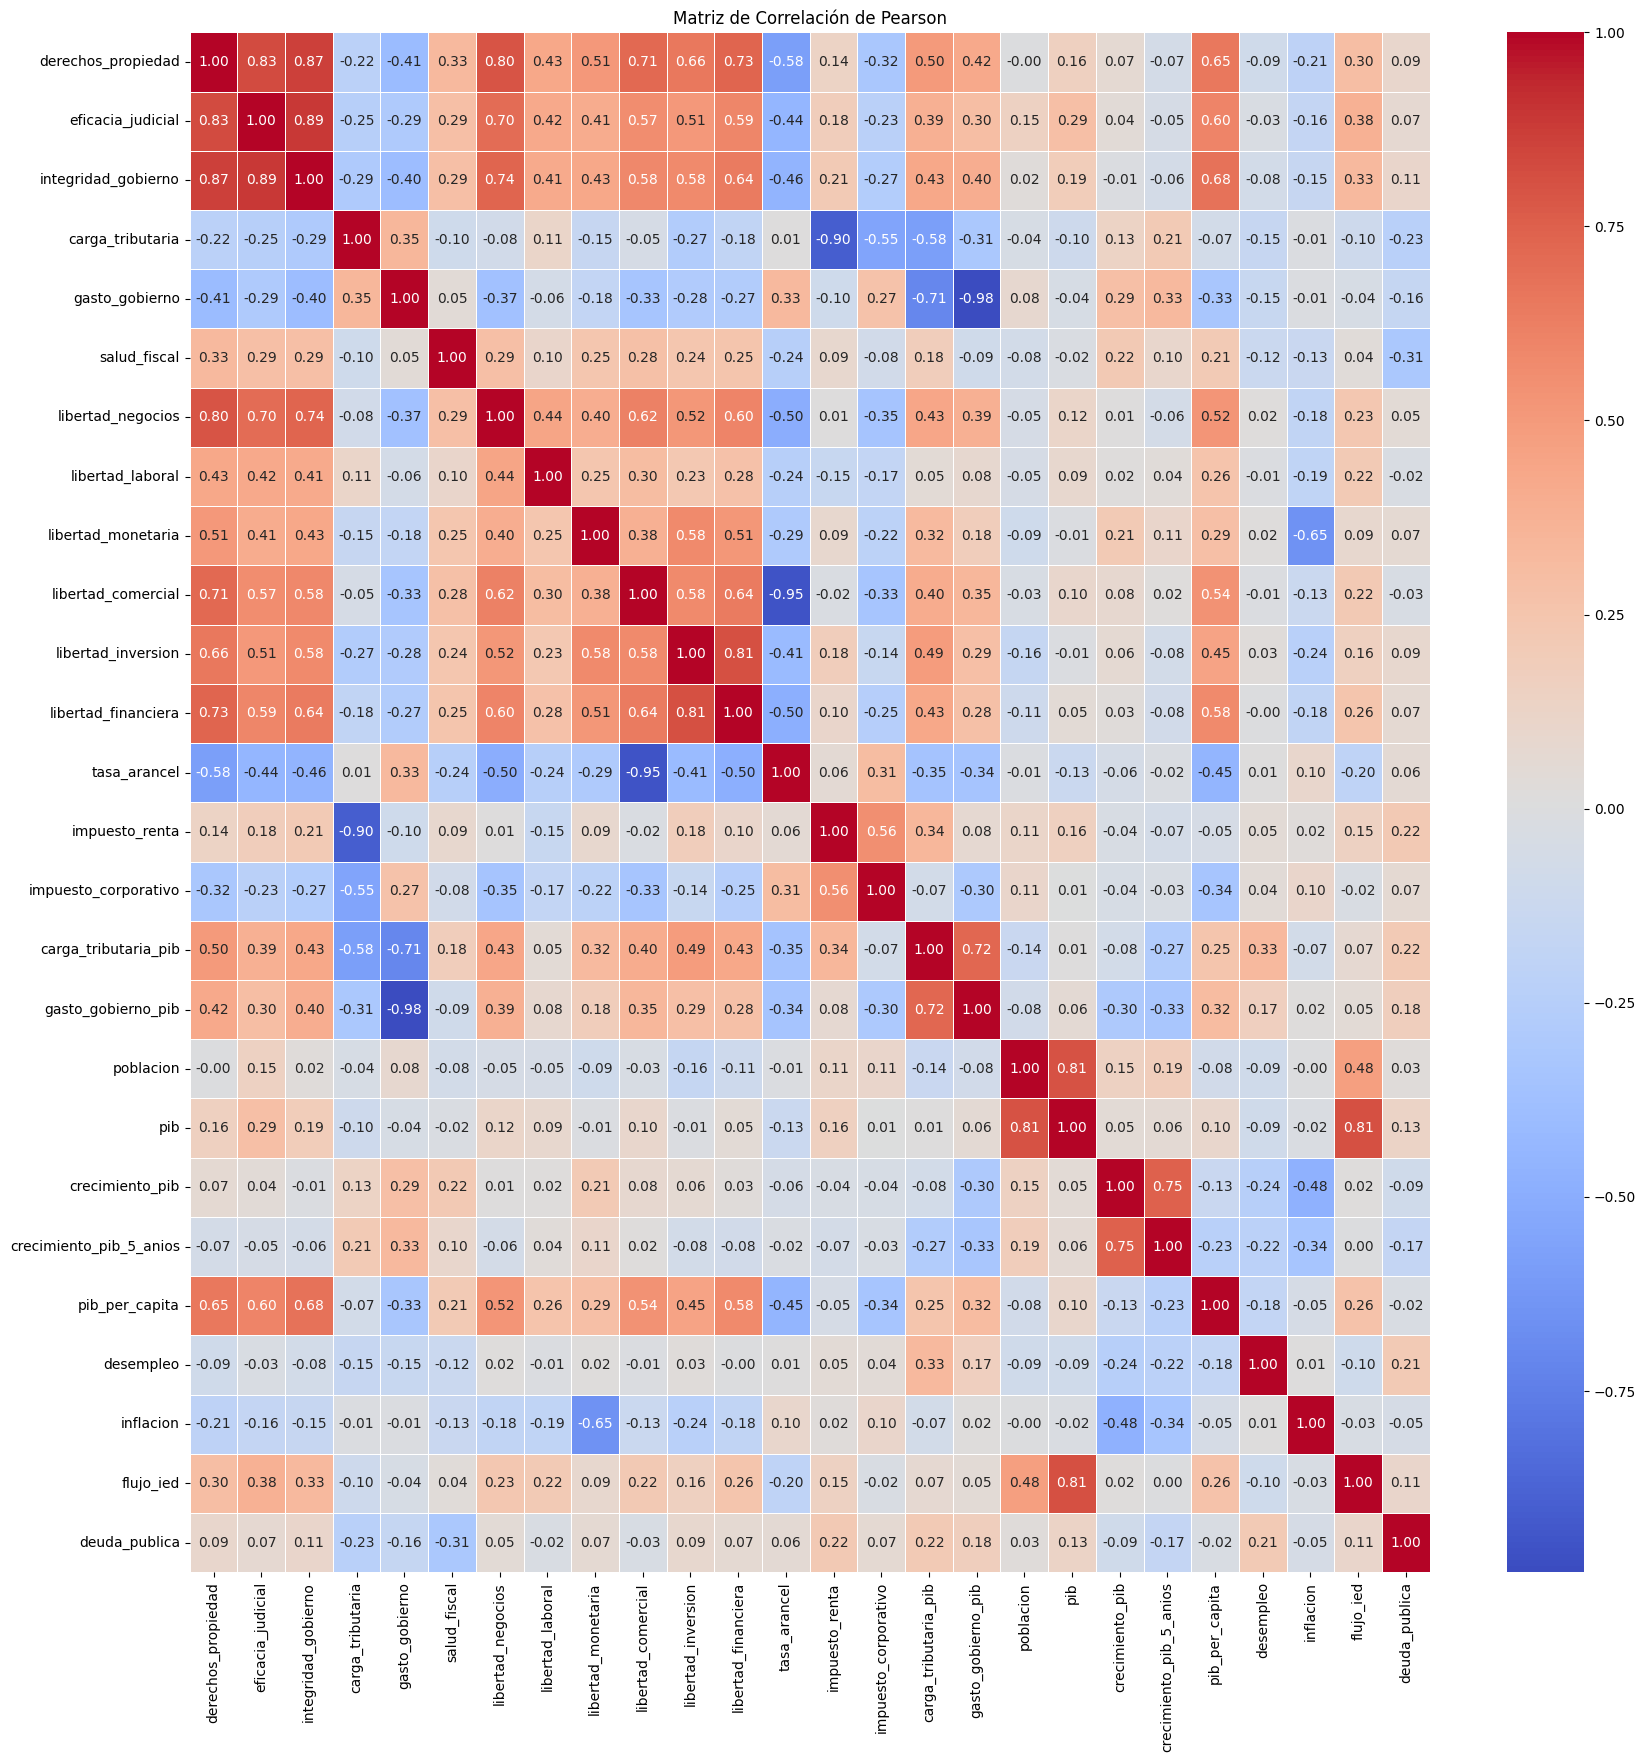

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(20, 20))  # Ajustar tamaño del gráfico
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación de Pearson")
plt.show()

🔍 Análisis del Mapa de Calor de Correlaciones

A partir del mapa de calor generado con las correlaciones entre variables macroeconómicas, se pueden obtener los siguientes insights:


✅ Correlaciones Positivas:

    Eficacia Judicial y Derechos de Propiedad: Existe una fuerte correlación positiva entre ambas variables. Esto indica que a mayor eficacia del sistema judicial, mayor es la protección de los derechos de propiedad.

    Integridad del Gobierno y Eficacia Judicial: También se observa una correlación positiva entre estas variables, lo que sugiere que gobiernos con mayor integridad tienden a tener sistemas judiciales más eficaces.

❌ Correlaciones Negativas:

    Tasa Arancelaria y Libertad Comercial: Se identifica una alta correlación negativa. Esto significa que a mayor tasa de aranceles, menor es la libertad comercial en el país.

    Inflación y Libertad Monetaria: Existe una correlación negativa entre estas variables. En términos simples, una mayor inflación suele estar asociada a una menor libertad o control monetario.

    📌 Estas correlaciones no implican causalidad, pero sí permiten identificar relaciones lineales fuertes que pueden ser útiles para futuros análisis o hipótesis.